In [19]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.optimizers import adam
from keras.callbacks import TensorBoard
from keras import backend as K
from keras.utils import to_categorical
from keras.datasets import cifar10
if K.backend()=='tensorflow':
    K.set_image_data_format("channels_last")

In [20]:
# Importing more python libraries
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Load the CIFAR-10 Python dataset from the website
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [22]:
# Loading the class labels
classes = 10
cifar_labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

horse


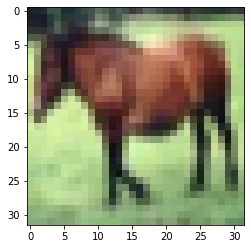

In [23]:
# check one image
r = 7
plt.imshow(x_train[r])
print(cifar_labels[y_train[r][0]])

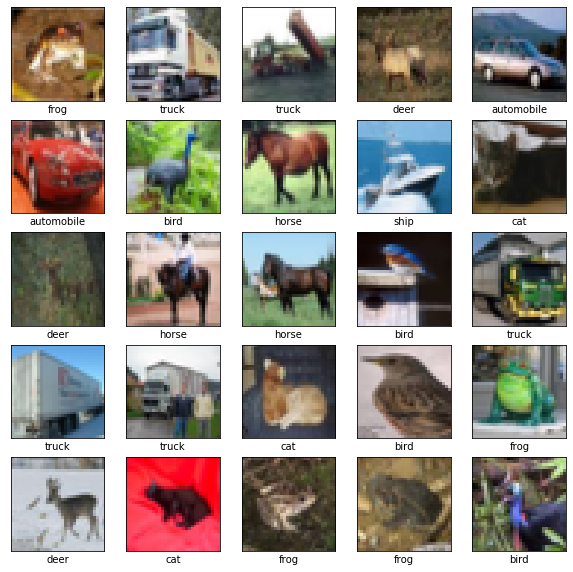

In [24]:
# view the first 25 images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(cifar_labels[y_train[i][0]])
plt.show()

In [25]:
# Normalizing
mean = np.mean(x_train, axis = (0,1,2,3))
std = np.std(x_train, axis = (0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

In [26]:
# one hot encoding
y_train = to_categorical(y_train, classes, dtype=int)
y_test = to_categorical(y_test, classes, dtype=int)

In [27]:
# Checking the shape
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


In [30]:
# set the input shape
input_shape = (32,32,3)

In [31]:
# Create the Neural Network
def cifar10Model():
    model = Sequential()
    # first layer
    model.add(Conv2D(32, (3, 3), padding='same', activation = 'relu', input_shape = input_shape))
    model.add(Conv2D(32, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size =(2, 2)))
    model.add(Dropout(0.4))
    
    # second layer
    model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size =(2, 2)))
    model.add(Dropout(0.4))
    
    # third layer
    model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size =(2, 2)))
    model.add(Dropout(0.4))
    
    # last layer
    model.add(Flatten())
    model.add(Dense(512, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation='softmax'))
    
    return model
    

In [32]:
K.clear_session()
model = cifar10Model()

In [33]:
AdamOpt = adam(lr=0.001)
model.compile(optimizer=AdamOpt, loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)         

In [71]:
class CustomCallback(TensorBoard):
    def on_epoch_end(self, epoch, logs={}):
        if (epoch % 5 == 0):
            print('Finished epoch', epoch)
            print('------------------------')
            print('Loss on validation set =', logs.get('val_loss'))
            print('Accuracy train = ', logs.get('acc'))
            print('Accuracy Val =', logs.get('val_acc'))
            return

In [75]:
batch_size = 256
epochs = 50

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test), shuffle=True)

Text(0.5, 1.0, 'Loss curves')

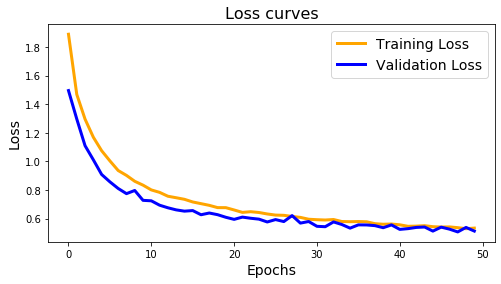

In [80]:
# loss curves
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], 'orange',linewidth=3.0)
plt.plot(history.history['val_loss'], 'blue', linewidth=3.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14, loc = 'upper right')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Loss curves', fontsize=16)

Text(0.5, 1.0, 'Accuracy curves')

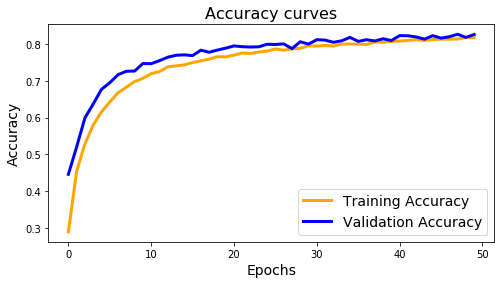

In [83]:
# Accuracy curves
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], 'orange',linewidth=3.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14, loc = 'lower right')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy curves', fontsize=16)

In [188]:
# Make a prediction
prediction = model.predict(x_test, batch_size=32)

In [189]:
print(prediction[0])

[3.2658683e-04 4.4190438e-05 2.5619366e-04 9.3184227e-01 3.9913459e-04
 5.6481451e-02 9.9883443e-03 5.0237263e-04 4.7689155e-05 1.1175059e-04]


In [194]:
print(y_test[0])

[3]


In [200]:
labels_pred = np.argmax(prediction, axis=1)
labels_pred =np.array(labels_pred)
print(labels_pred)

[3 8 8 ... 5 1 7]


In [252]:
labels_test = (y_test.reshape(1,-1))[0]
print(labels_test)

[3 8 8 ... 5 1 7]


In [255]:
correct = (labels_pred == labels_test)
print(correct)
print("Number of correct predictions: %d" % sum(correct))

[ True  True  True ...  True  True  True]
Number of correct predictions: 8258


In [256]:
num_images = len(correct)
parcent = (sum(correct)*100)/num_images
print('Accuracy: %.2f%%' % parcent)

Accuracy: 82.58%


In [266]:
incorrect = (correct == False)

In [258]:
# Images of the test-set that have been incorrectly classified.
images_error = x_test[incorrect]

# Get predicted classes for those images
labels_error = labels_pred[incorrect]

# Get true classes for those images
labels_true = y_test[incorrect]

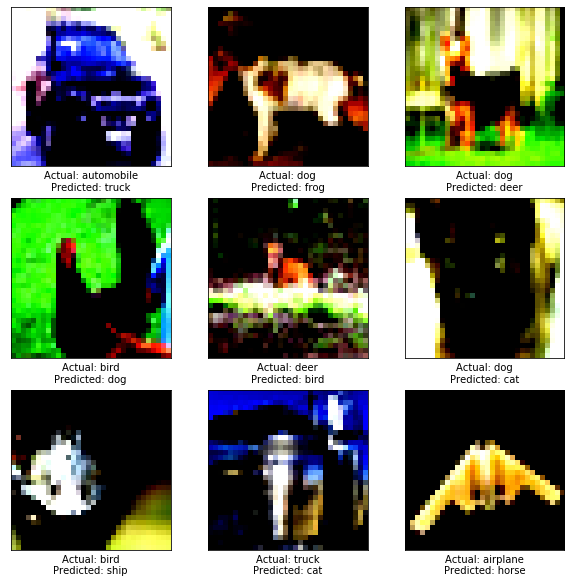

In [293]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_error[i])
    plt.xlabel('Actual: %s\nPredicted: %s'%(cifar_labels[labels_true[i][0]], cifar_labels[labels_error[i]]))
plt.show()